# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)

df = pd.read_csv('ecommerce_preparados.csv')
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())

df = df.drop(columns=['Unnamed: 0','Título', 'Review1', 'Review2', 'Review3', 'Desconto_MinMax'])
df['Desconto'] = df['Desconto'].fillna(0)
print(df['Desconto'].isnull().sum())
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()
print(df.info())


   Unnamed: 0                                             Título  Nota  \
0           0  Pijama Cirurgico  Scrub Roupa Privativa Hospit...   4.0   
1           1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...   4.5   
2           2  Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...   4.7   
3           3  Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...   4.6   
4           4  Kit 3 Short Jeans Feminino Cintura Alta Barato...   4.4   

   N_Avaliações  Desconto                            Marca   Material  \
0         273.0       NaN  toronto uniformes profissionais  poliéster   
1        3034.0      18.0                             lupo    algodão   
2        5682.0      20.0                            zorba    algodão   
3        1700.0      22.0                             mash    algodão   
4         507.0       9.0                     menina linda       jean   

       Gênero        Temporada  \
0  Sem gênero     não definido   
1   Masculino   outono/inverno   
2   Masculino 

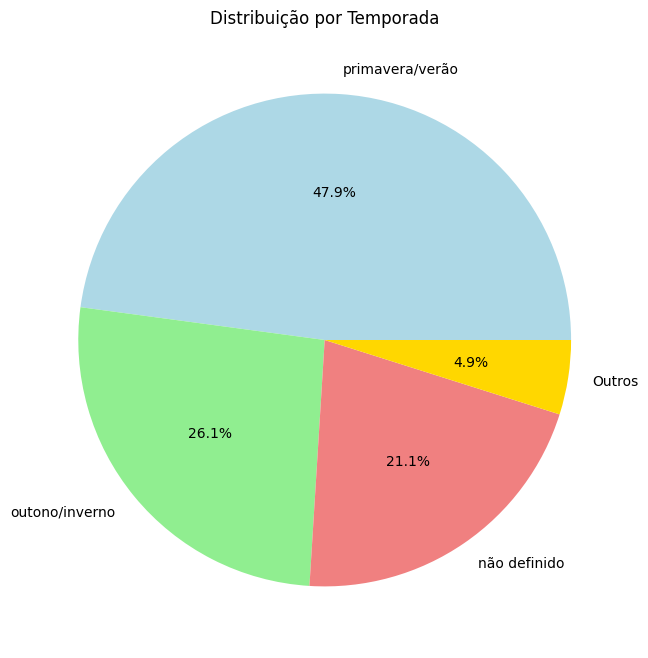

In [31]:
# Gráfico de Pizza (Proporção de Temporadas)
contagens = df['Temporada'].value_counts()

porcentagens = contagens / contagens.sum() * 100

categorias_abaixo_de_5 = porcentagens[porcentagens < 5].index

contagens_agrupadas = contagens.copy()
contagens_agrupadas[categorias_abaixo_de_5] = 0  
contagens_agrupadas['Outros'] = contagens[categorias_abaixo_de_5].sum()  

contagens_agrupadas = contagens_agrupadas[contagens_agrupadas > 0]

plt.figure(figsize=(8, 8))
contagens_agrupadas.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('Distribuição por Temporada')
plt.ylabel('')
plt.show()

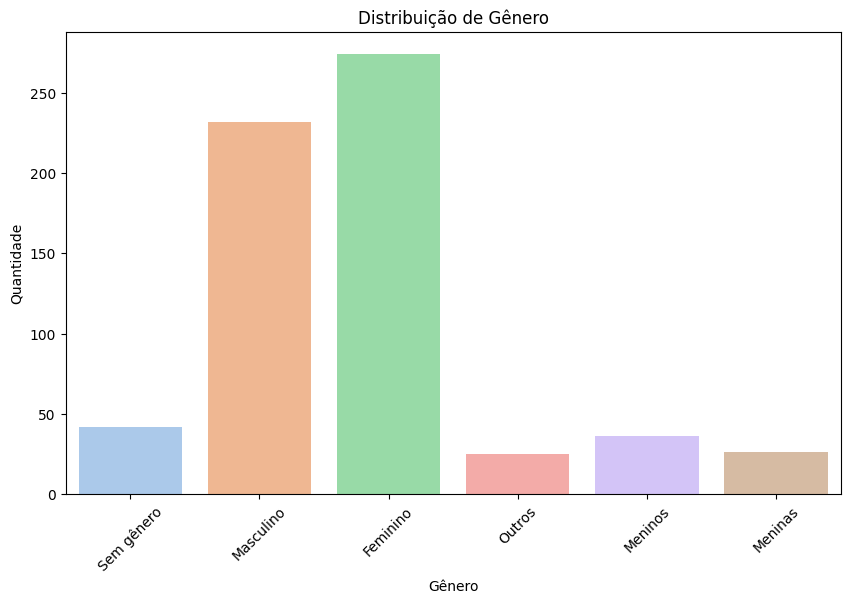

In [ ]:
#Gráfico de Barras (Contagem por Gênero)

contagens = df['Gênero'].value_counts()

porcentagens = contagens / contagens.sum() * 100

categorias_abaixo_de_3 = porcentagens[porcentagens < 3].index

df['Gênero Agrupado'] = df['Gênero'].replace(categorias_abaixo_de_3, 'Outros')

plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero Agrupado', hue='Gênero Agrupado', data=df, palette='pastel', legend=False)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

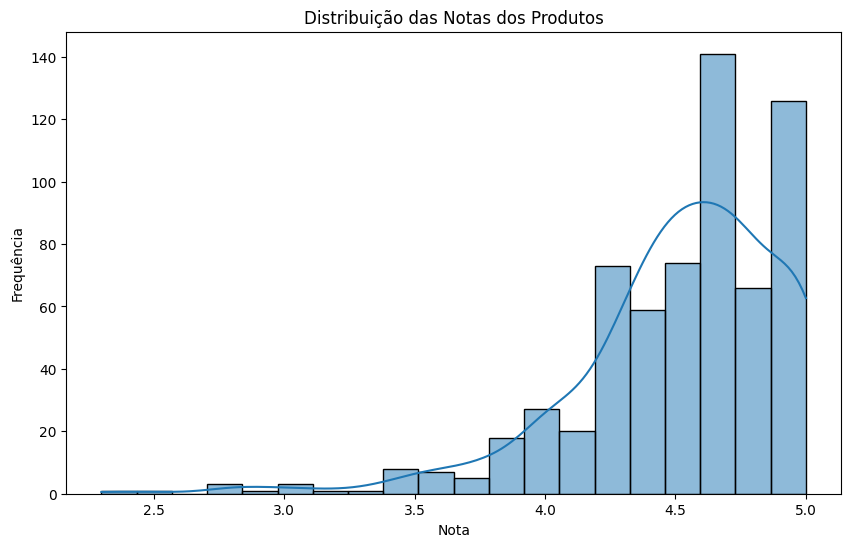

In [33]:
#Histograma (Distribuição da nota)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Nota', bins=20, kde=True)
plt.title('Distribuição das Notas dos Produtos')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

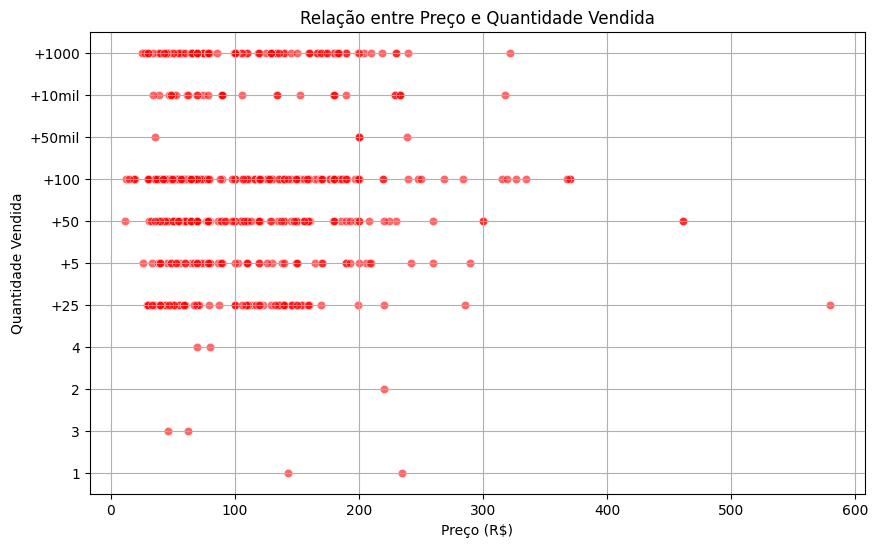

In [ ]:
#Gráfico de Dispersão (Relação de Preço e Quantidade Vendida)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preço', y='Qtd_Vendidos', alpha=0.6, color='red')
plt.title('Relação entre Preço e Quantidade Vendida')
plt.xlabel('Preço')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

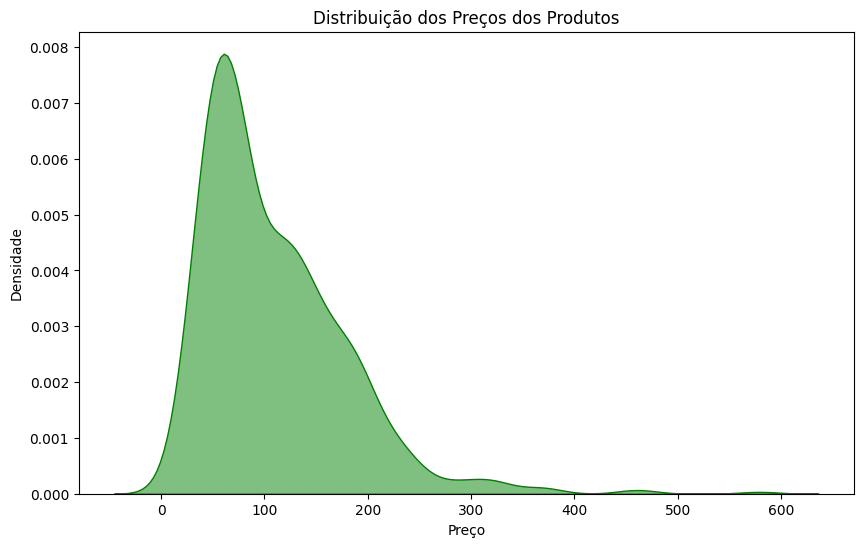

In [ ]:
#Gráfico de Densidade (Distribuição dos Preços)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Preço', fill=True, color='green', alpha=0.5)
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.show()

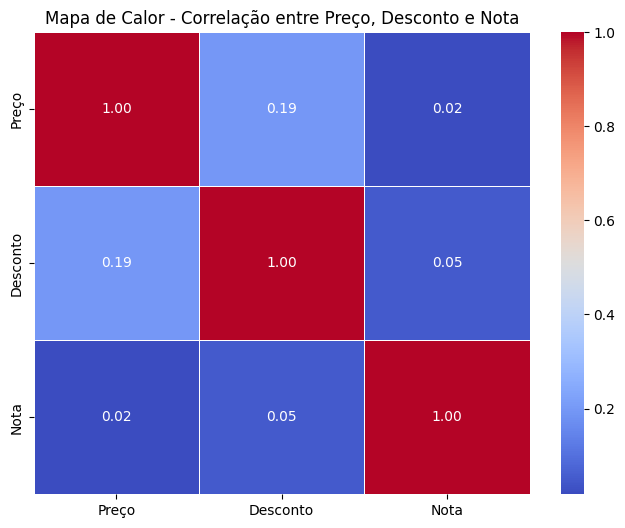

In [37]:
#Gráfico de calor (Relação entre preço, desconto e nota)

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Preço', 'Desconto', 'Nota']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlação entre Preço, Desconto e Nota')
plt.show()

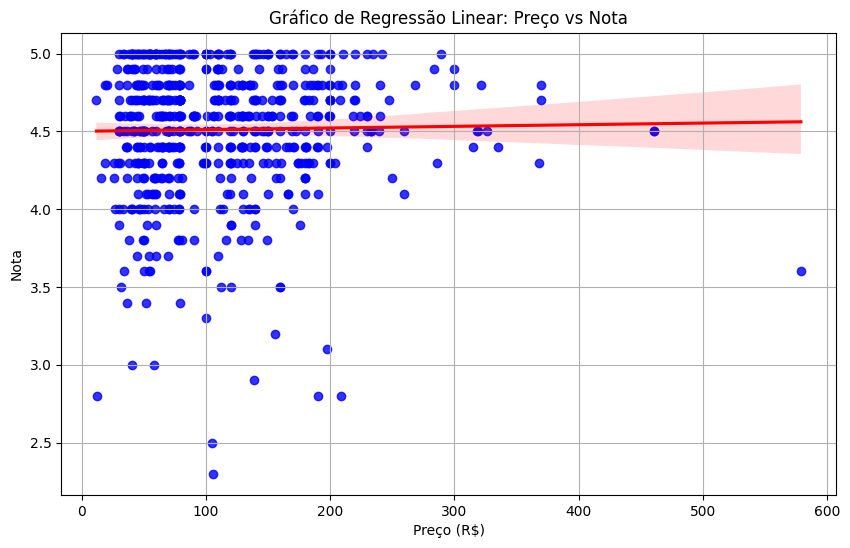

In [ ]:
#Gráfico de Regressão (preço vs nota)

plt.figure(figsize=(10, 6))
sns.regplot(x='Preço', y='Nota', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Gráfico de Regressão Linear: Preço vs Nota')
plt.xlabel('Preço (R$)')
plt.ylabel('Nota')
plt.grid(True)
plt.show()